In [1]:
import csv
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
import string
%matplotlib inline 

In [2]:
def cleanToLetters(str):
    remainingChars = []
    for ch in str:
        if (ch in string.ascii_letters or ch == ' '):
            remainingChars.append(ch)
    newString = string.join(remainingChars, "")
    return newString

In [122]:
responses = []
rawReponses = []
grades = []
with open('schell9.txt', 'rb') as csvfile:
    responseReader = csv.reader(csvfile, delimiter="\t")
    i = 0
    for row in responseReader:
        course = row[6]
        numericGrade = row[9]
        letterGrade = row[10]
        response = row[13]
        if (True or course == 'M 408N'):
            if "xml" not in response and "0px" not in response:
                rawReponses.append(response)
                grades.append(numericGrade)
                responses.append(cleanToLetters(response))

In [123]:
data = {'grades' : grades, 'responses' : responses}
frame = pd.DataFrame(data)
frame

,grades,responses
0,91.91371657140412,How to compute inverse trigonometry
1,91.91371657140412,Figuring out what the natural domain of f is ...
2,95.74500931761594,I am still confused about inverse trig functi...
3,95.74500931761594,In general I am a bit confused about everythi...
4,95.74500931761594,Daniel Garcia EID djg I had significant troub...
5,95.74500931761594,Im still confused on the three cases slide an...
6,95.74500931761594,the first question
7,95.74500931761594,Domain and range inverse quadrants
8,93.44328358415287,i am still confused about one law of logarith...
9,93.44328358415287,not so much confused just needing to practice...


In [124]:
vectorizer = CountVectorizer(min_df=1, stop_words = 'english')


In [125]:
wordVector = vectorizer.fit_transform(responses)

In [126]:
wordVector.shape

(17322, 5365)

In [127]:
vectorizer.vocabulary_

{u'aided': 110,
 u'todays': 4810,
 u'hypotanuse': 2266,
 u'similarity': 4221,
 u'andre': 162,
 u'cofused': 722,
 u'asymp': 358,
 u'fxpiecewise': 1988,
 u'ordermoving': 3355,
 u'swag': 4619,
 u'calculate': 552,
 u'congitive': 840,
 u'segments': 4120,
 u'sines': 4263,
 u'contained': 872,
 u'unanswered': 4955,
 u'swap': 4620,
 u'xto': 5296,
 u'teaching': 4684,
 u'logiced': 2841,
 u'discontunities': 1327,
 u'digit': 1299,
 u'misunderstanding': 3090,
 u'antiderivates': 187,
 u'infnite': 2432,
 u'symptotes': 4634,
 u'affect': 96,
 u'bringing': 525,
 u'integrel': 2490,
 u'differentiated': 1266,
 u'basics': 432,
 u'skills': 4308,
 u'solution': 4357,
 u'xgta': 5263,
 u'satnads': 4069,
 u'ysupx': 5346,
 u'unrelated': 5021,
 u'additionsubmultdivision': 80,
 u'sleep': 4312,
 u'concaves': 780,
 u'ups': 5037,
 u'coeffienent': 716,
 u'fxax': 1972,
 u'force': 1871,
 u'spansupspan': 4387,
 u'miller': 3050,
 u'indetify': 2387,
 u'second': 4105,
 u'limsubxgtcsubgx': 2750,
 u'peacewise': 3434,
 u'nthn': 3

In [128]:
len(vectorizer.vocabulary_)

5365

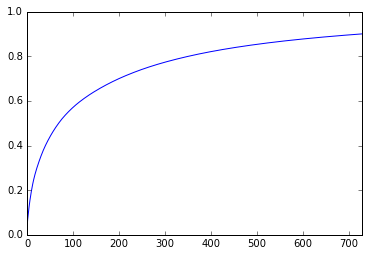

In [191]:
# View the accumulated sum of the eigenvalue ratios looking for the "elbow" to use as a cut off
pca = PCA(n_components=0.9)
pca.fit(wordVector.toarray())

l = []
for i in range(0, len(pca.explained_variance_ratio_)):
    accumulatedVariance = sum(pca.explained_variance_ratio_[0:(i+1)])
    l.append(accumulatedVariance)
             
s = pd.Series(l)
s.plot()

In [211]:
# Obtain the base vectors for a 200 dimensional space.
pca = PCA(n_components=200)
pca.fit(wordVector.toarray())
sum(pca.explained_variance_ratio_)

0.69903030099682006

In [194]:
pca.explained_variance_ratio_

array([ 0.03830083,  0.02994186,  0.02008199,  0.0185408 ,  0.01734667,
        0.01642149,  0.01457838,  0.014073  ,  0.01276429,  0.01228867,
        0.01187548,  0.01083705,  0.01032245,  0.0100173 ,  0.00884676,
        0.0086712 ,  0.00831067,  0.00765134,  0.00740151,  0.00713784,
        0.00699154,  0.00660336,  0.00648237,  0.0062575 ,  0.00617524,
        0.00603056,  0.00601753,  0.00593248,  0.00580085,  0.00559698,
        0.00544078,  0.0053711 ,  0.00529674,  0.00518232,  0.00504013,
        0.00487034,  0.00478665,  0.00468299,  0.00457408,  0.00443262,
        0.00436312,  0.00425777,  0.00418094,  0.00407097,  0.00398997,
        0.00396206,  0.00391093,  0.0038867 ,  0.00379616,  0.00374681,
        0.00369447,  0.00364552,  0.0036154 ,  0.00353641,  0.00346234,
        0.0033788 ,  0.00335135,  0.00331915,  0.00327257,  0.00322682,
        0.00316678,  0.00312854,  0.00306997,  0.00300629,  0.00299115,
        0.00296258,  0.00291768,  0.00289447,  0.00284671,  0.00

In [212]:
max(abs(pca.components_[0]))

0.8610980115087179

In [213]:
# look for the most signicant word in the most significant component of our reduced space
for i in range(0, len(pca.components_[0])):
    if abs(pca.components_[0][i]) > 0.8:
        for key, value in vectorizer.vocabulary_.iteritems():
            if (value == i):
                print key

confused


In [214]:
wordVectorReduced = pca.transform(wordVector.toarray())

In [215]:
wordVectorReduced.shape

(17322, 200)

In [216]:
Y = np.array(grades, dtype = float)

In [217]:
Y.shape

(17322,)

In [218]:
X = pd.DataFrame(wordVectorReduced)

In [219]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.239773,-0.227214,0.182539,0.044586,-0.154606,0.000932,-0.044944,-0.021523,-0.062314,0.048491,...,0.044858,-0.003611,-0.034950,0.027768,0.039886,-0.041887,-0.010945,-0.024267,0.074145,0.037300
1,0.124413,-0.188826,0.601618,0.292857,-0.357005,-0.058050,-0.078151,0.028326,-0.066923,0.109205,...,-0.116360,0.063738,-0.023541,-0.018859,-0.019674,0.034829,0.138015,-0.055119,0.048573,0.039327
2,-0.658473,0.506947,1.302718,-0.135192,-0.887152,-0.259678,0.000347,0.028043,0.036922,0.155112,...,0.047125,-0.025058,-0.007592,-0.042137,-0.018654,-0.001577,-0.018216,0.038835,0.012181,0.004495
3,-0.833121,0.283512,0.408681,-0.355718,-0.231582,0.655542,0.261613,0.880099,0.693880,-1.689000,...,0.064865,-0.167230,-0.048149,-0.185928,0.128753,0.047970,0.178992,-0.368361,0.287411,-0.056562
4,-0.036114,0.071187,0.293486,0.434429,0.639243,0.125513,-0.020338,0.522740,0.422071,-1.275652,...,-0.108130,-0.008434,-0.053164,-0.092096,0.057649,-0.066720,0.133719,0.044518,0.112250,0.086065


In [220]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [221]:
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

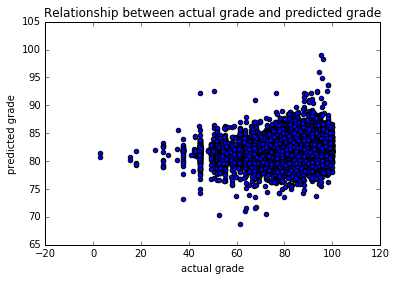

In [222]:
# your turn
plt.scatter(Y, lm.predict(X))
plt.xlabel("actual grade")
plt.ylabel("predicted grade")
plt.title("Relationship between actual grade and predicted grade")

In [223]:
print 'Number of coefficients:', len(lm.coef_)

Number of coefficients: 200


In [224]:
print np.mean((Y - lm.predict(X)) ** 2)

140.293188171


In [225]:
print np.mean((Y - np.mean(Y)) ** 2)

143.005976774
